# RADIAL BASIS FUNCTION NETWORKS FROM SCRATCH

Radial basis function (RBF) networks represent a different architecture from feed-forward networks. It has only three layers: an input layer, a single hidden layer, and an output layer.

1. The number of input units is equal to the data's dimensionality. There is no computation here.
2. The hidden layer is different from the feed-forward networks as each unit is defined by an RBF function, like the Gaussian RBF function:
$$ Gaussian RBF = exp(- \frac {|x - μ_i|^{2}}{2σ^{2}})$$
    where μ is the prototype vector, and σ is the bandwidth. These parameters can be learned in an unsupervised or supervised way. The common method is the unsupervised way. 
   
   - We can select the prototype vectors (μ) using different methods, like a randomly selecting from the training dataset or using *k*-means clustering algorithm. 
   - The bandwidth could differ for each unit or be equal across all units. It can be selected randomly or based on the distances between training points and prototypes.

   The RBF function uses smooth transition centres instead of clustering data using hard sharp circles.
3. The output layer has weights that are connected to the hidden layer. The weights could be learned by a simple matrix inversion without the need for backpropagation. 
$$ \hat{y} = A \cdot W $$
$$ W = A^{-1} \cdot y $$


<center>  <img src = "https://github.com/MaysaShaar/RBFNetworks/blob/main/RBFnet.png?raw=true" width="600" /> 

In [1]:
import numpy as np
import sklearn.datasets
import sklearn.model_selection
import matplotlib.pyplot as plt
from MyKmeansClass import Kmeans 

import warnings
warnings.filterwarnings("ignore")


#### Gaussian RBF function:

In [2]:
def rbf_function(x, prototype, bandwidth):
    """ Return an array where each element corresponds 
    to the Euclidean distance between a data point in x and the centroid. """
        
    return np.exp(-np.linalg.norm(x - prototype, axis=1)**2 / bandwidth**2)

#### Learn weights using matrix inversion

In [3]:
def learn_weights(A, y):

    # Return the least-squares solution to a linear matrix equation
    w = np.linalg.lstsq(aug_train, y_train)[0]
    
    return w

### The main structure of an RBF network

``` python

# Select the prototype vectors using k-means algorithm
kmeans = Kmeans(X_train, y_train, centers_number)
centroids, _ = kmeans.fit()

# Calculate the RBF function for each centroid
rbfs_train = np.array([rbf_function(X_train, c, bandwidth) for c in centroids])
rbfs_test = np.array([rbf_function(X_test, c, bandwidth) for c in centroids])

# Add bias neurons
aug_train = np.column_stack((np.ones(len(X_train)), *rbfs_train))
aug_test = np.column_stack((np.ones(len(X_test)), *rbfs_test))

# Learn weights for the output layer 
w = learn_weights(aug_train, y_train)

# The predection from the test dataset
y_preds = aug_test @ w

# Calculate the accuracy
accuracy = (y_preds == y_test).mean()


---
---

# Generate Data

In [5]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()

# Access the features (X) and target (y) data
X = data.data
y = data.target

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

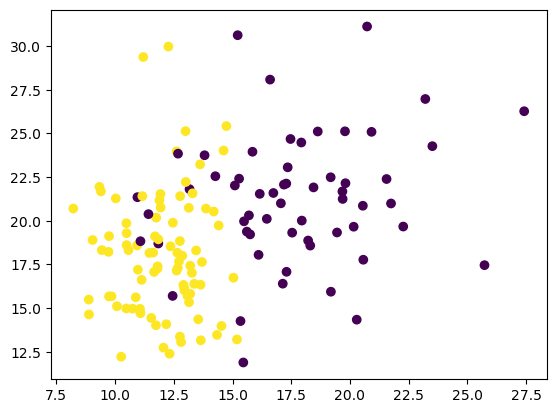

In [9]:
X_test1 = X_test.T
plt.scatter(X_test1[0, :], X_test1[1, :], c=y_test)

#### To determine the value of the bandwidth and the number of prototype vectors (the number of units in the hidden layer) we can try random values and select the one that provides the highest accuracy.

#### Selecting the bandwidth
Same bandwidth on all the neurons

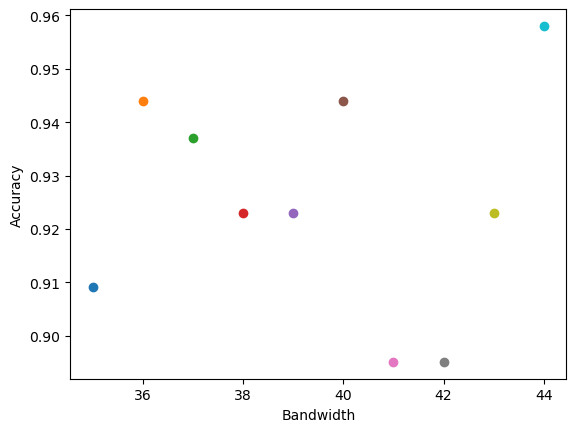

In [11]:
for bandwidth in range(35, 45):
#     bandwidth = bandwidth/10

    kmeans = Kmeans(X_train, y_train, 35)
    centroids, _ = kmeans.fit()

    rbfs_train = np.array([rbf_function(X_train, c, bandwidth) for c in centroids])
    rbfs_test = np.array([rbf_function(X_test, c, bandwidth) for c in centroids])

    aug_train = np.column_stack((np.ones(len(X_train)), *rbfs_train))
    aug_test = np.column_stack((np.ones(len(X_test)), *rbfs_test))

    w = learn_weights(aug_train, y_train)

    y_preds = aug_test @ w

    y_preds = np.round(y_preds)

    accuracy = (y_preds == y_test).mean()
    plt.scatter(x=bandwidth, y=accuracy)
    
plt.xlabel('Bandwidth')
plt.ylabel('Accuracy')
plt.show()

### Selecting the number of prototype vectors

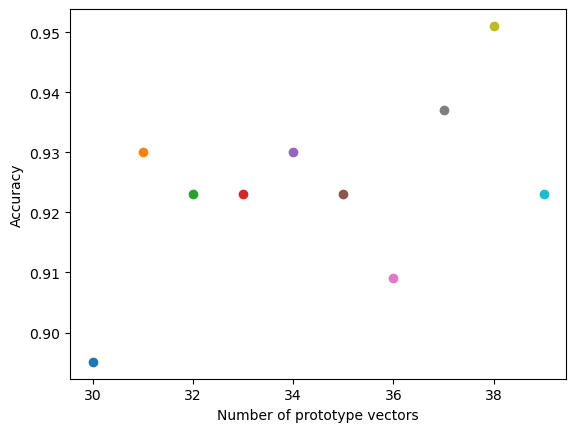

In [14]:
for k in range(30, 40):

    bandwidth = 44

    kmeans = Kmeans(X_train, y_train, k)
    centroids, _ = kmeans.fit()

    rbfs_train = np.array([rbf_function(X_train, c, bandwidth) for c in centroids])
    rbfs_test = np.array([rbf_function(X_test, c, bandwidth) for c in centroids])

    aug_train = np.column_stack((np.ones(len(X_train)), *rbfs_train))
    aug_test = np.column_stack((np.ones(len(X_test)), *rbfs_test))

    w = learn_weights(aug_train, y_train)

    y_preds = aug_test @ w

    y_preds = np.round(y_preds)

    accuracy = (y_preds == y_test).mean()
    plt.scatter(x=k, y=accuracy)

plt.xlabel('Number of prototype vectors')
plt.ylabel('Accuracy')
plt.show()

It appears that the best bandwidth is 44 and the bast prototype number is 38. 

In [15]:
# Select the prototype vectors using k-means algorithm
kmeans = Kmeans(X_train, y_train, 38)
centroids, _ = kmeans.fit()

# Calculate the RBF function for each centroid
rbfs_train = np.array([rbf_function(X_train, c, 44) for c in centroids])
rbfs_test = np.array([rbf_function(X_test, c, 44) for c in centroids])

# Add bias neurons
aug_train = np.column_stack((np.ones(len(X_train)), *rbfs_train))
aug_test = np.column_stack((np.ones(len(X_test)), *rbfs_test))

# Learn weights for the output layer 
w = learn_weights(aug_train, y_train)

# The predection from the test dataset
y_preds = aug_test @ w
y_preds = np.round(y_preds)

# Calculate the accuracy
accuracy = (y_preds == y_test).mean()
accuracy

0.9440559440559441